# Statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('../output/repositories.csv', index_col=0, low_memory=False)
data = data.fillna(0)
data.shape

(1859, 1000)

In [3]:
# Capture readmes for later use
readme = data.loc["readme", :]
data = data.drop("readme", axis=0)

In [4]:
# Converting to int
data = data.astype(float).astype(int)

In [5]:
topics = data.loc[data.index.str.startswith('t_'), :]
languages = data.loc[data.index.str.startswith('l_'), :]

## Repository topics

In [6]:
n_topics = topics.sum().sort_values(ascending=False)
n_topics[n_topics == 0].shape, n_topics[n_topics != 0].shape

((473,), (527,))

In [7]:
n_topics[n_topics != 0] = 1

In [8]:
topic_counts = n_topics.value_counts()
topic_counts.index = ["Yes", "No"]

(-1.25, 1.25, -1.25, 1.25)

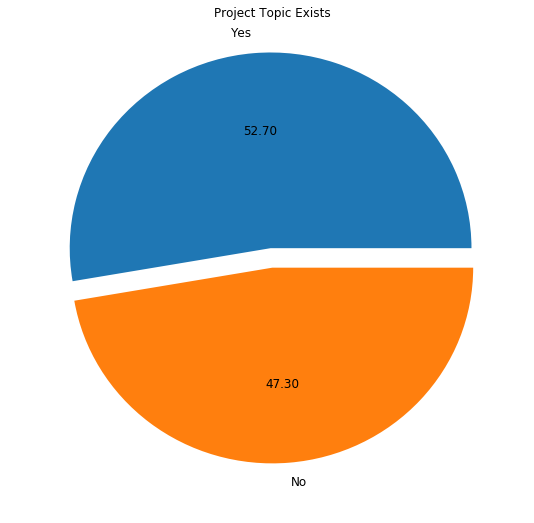

In [38]:
topic_counts.plot(
    kind='pie',
    figsize=(9, 9),
    fontsize=12,
    autopct="%.2f",
    explode=(0.1, 0),
    title="Project Topic Exists")
plt.axis('off')

## Repository Programming Languages

In [10]:
n_languages = languages.sum().sort_values(ascending=False)
n_languages[n_languages == 0].shape, n_languages[n_languages != 0].shape
n_languages[n_languages != 0] = 1

In [11]:
value_counts = n_languages.value_counts()
value_counts.index = ["Yes", "No"]

(-1.25, 1.25, -1.25, 1.25)

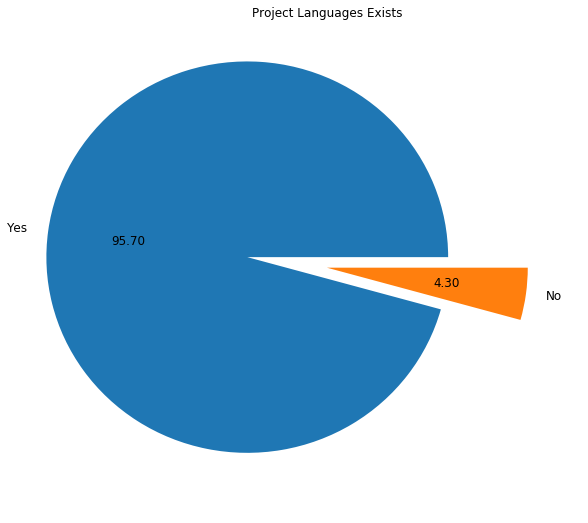

In [37]:
value_counts.plot(
    kind='pie',
    figsize=(9, 9),
    fontsize=12,
    autopct="%.2f",
    explode=(0.4, 0),
    title="Project Languages Exists")
plt.axis('off')

## README-files

In [13]:
readme = pd.concat([readme, readme.str.len()], axis=1)

In [14]:
readme.columns = ["Content", "Length"]

In [15]:
readme.Length.agg(["min", "max", "mean", "median", "std"])

min          115.00000
max       505402.00000
mean       13257.88300
median      6891.00000
std        25287.51466
Name: Length, dtype: float64

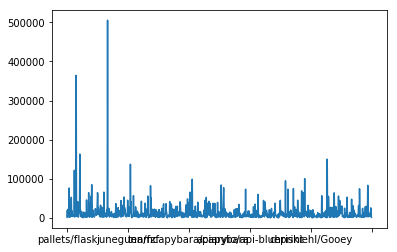

In [16]:
readme.Length.plot()